A pointer is a variable that contains the address of a variable

pointers and arrays are closely related - this ch also explores this relationship & how to exploit it.

## 5.1 Pointers and Addresses

A typical machine has an array of consecutively numbered or addressed memory cells that may be manipulated individually or in groups.

A pointer is a groups of cells (often 2 or 4) that can hold an address.

So if `c` is a char & `p` is a pointer that points to it, we could represent that situation in this way:
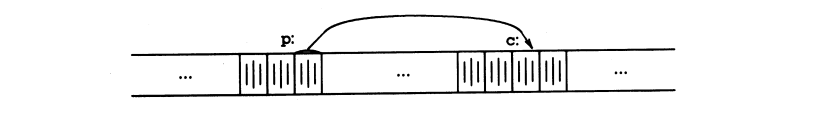

**the unary operator `&` gives the address of an object, so the statement `p = &c;` assigns the address of `c` to the variable `p`**
- `p` is said to "point to" `c`

The `&` operator only applies to objects in memory
- variables & array elements
- it cannot be applied to expressions, constants, or register variables

**the unary operator `*` is the indirection or dereferencing operator**
- when applied to a pointer, it accesses the object the pointer points to

**How to declare a pointer & how to use `&` and `*`:**

    int x = 1, y = 2, z[10];
    int *ip;       /* ip is a pointer to int */

    ip = &x;       /* ip now points to x */
    y = *ip;       /* y is now 1 */
    *ip = 0;       /* x is now 0 */
    ip = &z[0];    /* ip now points to z[0] */

Since pointers are variables, they can be used without dereferencing 

eg: if `iq` is another pointer to int

    iq = ip

copies the contents of ip into iq, thus making ip point to whatever iq pointed to 

## 5.2 Pointers and Function Arguments
Since C passes arguments to functions by value, there is no direct way for the called function to alter a variable in the calling function.

eg: a sorting routine. it's not enough to write `swap(a, b);`

Because of call by value, `swap` can't affect the arguments `a` and `b` in the routine that called it.
- the function only swaps copies of `a` and `b`

The way to obtain the desired affect is for the calling program to pass pointers to the values to be changed: `swap(&a, &b);`

Since `&` produces the address of a variable, `&a` is a pointer to `a`

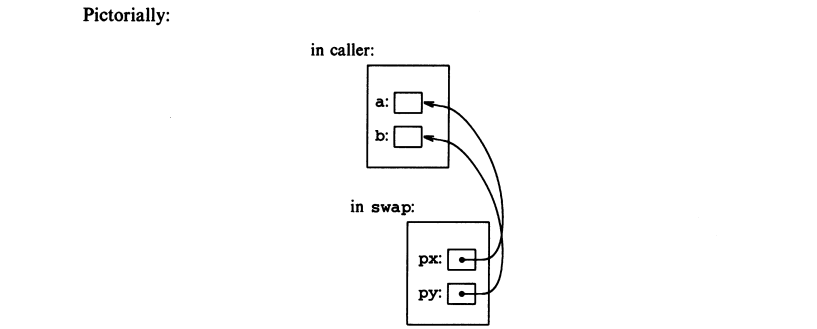

Pointer arguments enable a fn to access & change objects in the fn that called it.

## 5.3 Pointers and Arrays
Any operation that can be achieved with array subscripting can also be done with pointers
- the pointer version will in general be faster, but somewhat harder to understand

The declaration `int a[10];`

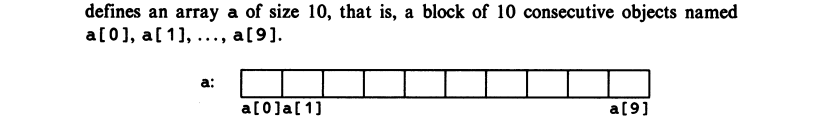

if `pa` is a pointer to an integer declared as: `int *pa;` then the assignment `pa = &a[0];` sets `pa` to point to the element `a[0]`

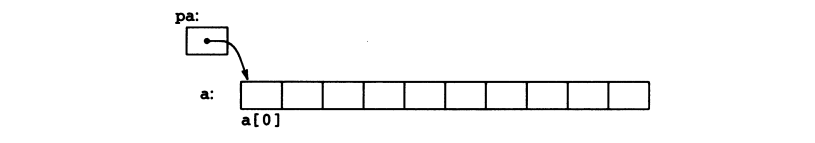

Now the assignment `x = *pa;` will copy the contents of `a[0]` into `x`

if `pa` points to `a[0]`, `*(pa+1)` refers to the contents of `a[1]`

The correspondance between indexing and pointer arithmetic is very close.
- By definition the value of a variable or expression of type array is the address of element zero of the array. 
- Thus after assignment `pa = &a[0];` pa and a have identical values

Since the name of an array is a synonym for the location of the intial element, the assignment `pa=&a[0]` can also be written as `pa=a;`
- a reference to `a[i]` can also be written as `*(a+i)`
    - in evaluating `a[i]` C converts it to `*(a+i)` immediately; the 2 forms are equivalent

Applying the `&` operator to both parts of this equivalence, `&a[i]` and `a+i` are also identical
- `a+i` is the address of the `i`th element beyond `a`

In short: and array-and-index expression is equivalent to one written as a pointer and offset

## 5.4 Address Arithmetic
Storage allocator. 2 routines
1. `alloc(n)` - returns a pointer `p` to n-consecutive character positions, which can be used by the caller of `alloc` for storing characters
2. `afree(p)` - releases the storage so it can be used again later

The storage managed by alloc is a stack (or a LIFO list)
- the standard lib provides analogous functions `malloc` & `free` that have no such restrictions

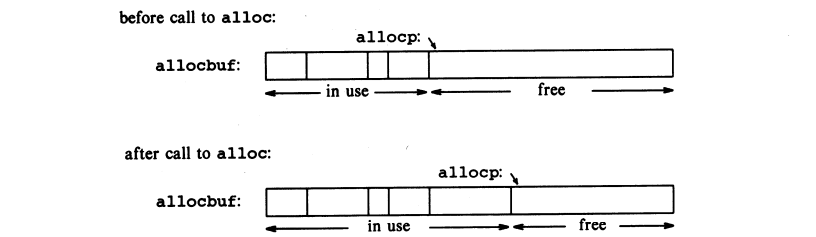

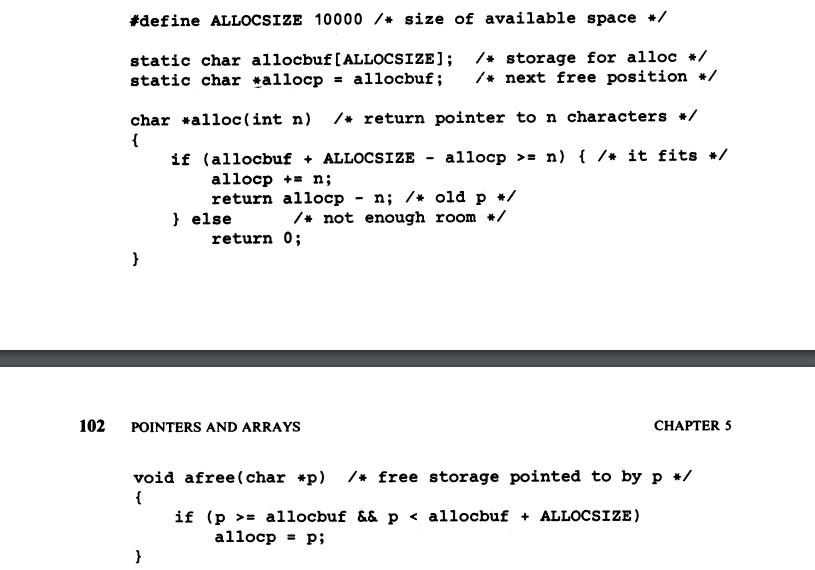

Pointers may be compared under certain conditions
- if p & q point to members of the same array, then relations like, ==, !=, >, etc work properly
- a pointer and an integer may be added or subtracted

## 5.5 Character Pointers and Functions
A string constant, written as: `"I am a string"` is an array of characters
- in the internal representation the array is terminated with `\0` so that programs can find the end
- the len in storage is therefor 1 more than in quotes

There is an important difference between these definitions:
- `char amessage[] = "now is the time"`    /* an array */
- `char *pmessage = "now is the time"`     /* a pointer */

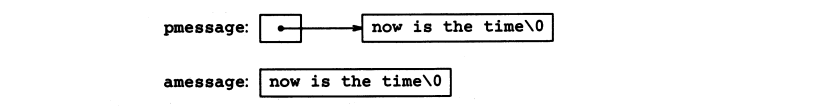

## 5.6 Pointer Arrays; Pointers to Pointers
Since pointers are variables themselves they can be stored in arrays as other variables can

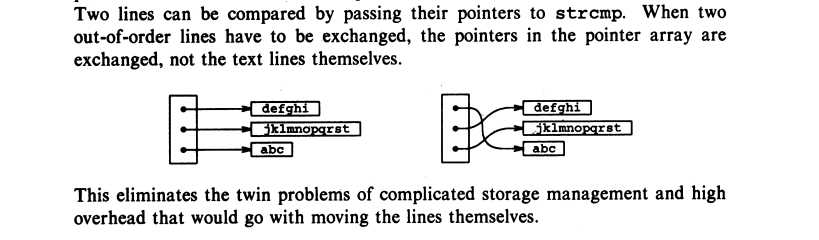

The sorting process has 3 steps
1. read all lines of input
2. sort them
3. print them in order

As usual, it's best to divide the program into functions that match this natural division, with the main routine controlling the other functions
- the input routine has to collect & save the characters of each line, and build an array of pointers to the line

`char *lineptr[MAXLINES]` says that lineptr is an array of MAXLINES elements, each element of which is a pointer to a char.
- `lineptr[i]` is a character pointer, and `*lineptr[i]` is the character it points to

## 5.7 Multi-dimensional Arrays
C provides rectangular multi-dimensional arrays, although in practice they're much less used than arrays of pointers

In C a 2 dimensional array is really a 1-dimensional array, each of whose elements is an array. Hence the subscripts are written as:

    array[i][j]    /* [row][col] */

rather than:

    array[i, j]    /* WRONG */

## 5.9 Pointers vs Multi-Dimensional Arrays

    int a[10][20];
    int *b[10];

- pointer arrays rows do not need to be of the same size
- the most frequent use of arrays of pointers is to store character strings of diverse lengths

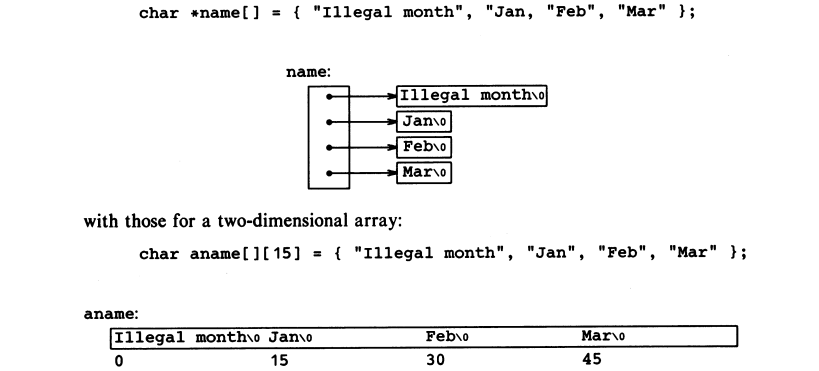

## 5.10 Command-line Arguments
In environments that support C, there is a way to pass command-line arguments or parameters to a program when it begins executing.

When `main` is called, it is called with 2 arguments
1. `argc` (arg count) - the number of command line arguments the program was invoked with
2. `argv` (arg vector) - a pointer to an array of character strings that contain the arguments, 1 per string

- `argv[0]` is the name by which the argument was invoked, so `argc` is atleast 1

eg: echo hello, world --> OUT: hello, world
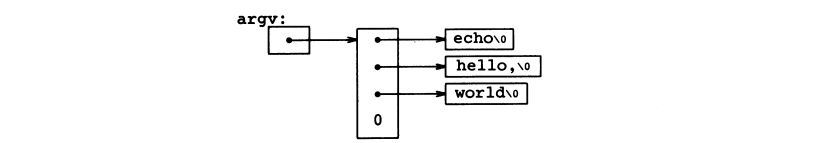

## 5.11 Pointers to Functions
In C, a function itself is not a variable but it's possible to define pointers to functions, which can be assigned, placed in arrays, passed to functions, returned by functions, etc
